Course Human-Centered Data Science ([HCDS](https://www.mi.fu-berlin.de/en/inf/groups/hcc/teaching/winter_term_2020_21/course_human_centered_data_science.html)) - Winter Term 2020/21 - [HCC](https://www.mi.fu-berlin.de/en/inf/groups/hcc/index.html) | [Freie Universität Berlin](https://www.fu-berlin.de/)
***
# A2 - Reproducibility Workflow


Your assignment is to create a graph that looks a lot like the one below one, starting from scratch, and following best practices for reproducible research.

![wikipedia_pageViews_2008-2020.png](img/wikipedia_pageViews_2008-2020.png)

## Before you start
1. Read all instructions carefully before you begin.
1. Read all API documentation carefully before you begin.
1. Experiment with queries in the sandbox of the technical documentation for each API to familiarize yourself with the schema and the data.
1. Ask questions if you are unsure about anything!
1. When documenting your project, please keep the following questions in your mind:
   * _If I found this GitHub repository, and wanted to fully reproduce the analysis, what information would I want?_
   * _What information would I need?_

## Step 1️⃣: Data acquisition
In order to measure Wikipedia traffic from January 2008 until October 2020, you will need to collect data from two different APIs:

1. The **Legacy Pagecounts API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pagecounts_data_(legacy)/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end)) provides access to desktop and mobile traffic data from December 2007 through July 2016.
1. The **Pageviews API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end)) provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.

For each API, you need to collect data for all months where data is available and then save the raw results into five (3+2) separate `JSON`files (one file per API query type) before continuing to step 2.

To get you started, you can use the following **sample code for API calls**:

In [109]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.ticker as ticker

### Prepare data collection: Define endpoints and queries

In [2]:
# Based on a template froom: https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb?format=raw

endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

# The legacy pagecount API makes available the pagecounts aggregated per project from January 2008 to July 2016
# start and end are set to match this timeframe
# end: in the monthly granularity this value is exclusive -> month +1
params_legacy_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

params_legacy_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

# According to the task, data can be queried reaching back to July 2015 and is supposed to be queried up to October 2020
# start and end are set to match this timeframe
# we are interested in user generated views: 'agent' is set to 'user'
params_pageviews_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020110100'
                        }

params_pageviews_mobile_app = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020110100'
                        }

params_pageviews_mobile_web = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020110100'
                        }


headers = {
    'User-Agent': 'https://github.com/chrisk280',
    'From': 'chrisk31@zedat.fu-berlin.de'
}

def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

### Query, inspect and save raw data

In [3]:
#legacy_mobile, pageviews_desktop, pageviews_mobile_app, pageviews_mobile_web

#### Legacy Pagecounts API: desktop

In [4]:
# query data
legacy_desktop_data = api_call(endpoint_legacy, params_legacy_desktop)

In [5]:
# inspect structure of data
legacy_desktop_data

{'items': [{'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008010100',
   'count': 4930902570},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008020100',
   'count': 4818393763},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008030100',
   'count': 4955405809},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008040100',
   'count': 5159162183},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008050100',
   'count': 5584691092},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008060100',
   'count': 5712104279},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timest

In [6]:
# load into dataframe, inspect dataframe
legacy_desktop_df = pd.DataFrame(legacy_desktop_data["items"])
legacy_desktop_df.head()

,project,access-site,granularity,timestamp,count
0,en.wikipedia,desktop-site,monthly,2008010100,4930902570
1,en.wikipedia,desktop-site,monthly,2008020100,4818393763
2,en.wikipedia,desktop-site,monthly,2008030100,4955405809
3,en.wikipedia,desktop-site,monthly,2008040100,5159162183
4,en.wikipedia,desktop-site,monthly,2008050100,5584691092


In [7]:
# check if data was queried for the correct time frame
pd.to_numeric(legacy_desktop_df["timestamp"]).min(), pd.to_numeric(legacy_desktop_df["timestamp"]).max()

(2008010100, 2016070100)

In [8]:
# everything looks correct -> save
with open('../data_raw/pagecounts_desktop-site_200801-201608.json', 'w') as f:
    json.dump(legacy_desktop_data, f)

#### Legacy Pagecounts API: mobile

In [9]:
# same approach as with legacy desktop data

In [10]:
legacy_mobile_data = api_call(endpoint_legacy, params_legacy_mobile)

In [11]:
# load into dataframe, inspect dataframe
legacy_mobile_df = pd.DataFrame(legacy_mobile_data["items"])
legacy_mobile_df.head()

,project,access-site,granularity,timestamp,count
0,en.wikipedia,mobile-site,monthly,2014100100,3091546685
1,en.wikipedia,mobile-site,monthly,2014110100,3027489668
2,en.wikipedia,mobile-site,monthly,2014120100,3278950021
3,en.wikipedia,mobile-site,monthly,2015010100,3485302091
4,en.wikipedia,mobile-site,monthly,2015020100,3091534479


In [12]:
# check if data was queried for the correct time frame
pd.to_numeric(legacy_mobile_df["timestamp"]).min(), pd.to_numeric(legacy_mobile_df["timestamp"]).max()

(2014100100, 2016070100)

In [13]:
# data for mobile device starts in 2014; everything looks correct -> save
with open('../data_raw/pagecounts_mobile-site_200801-201608.json', 'w') as f:
    json.dump(legacy_mobile_data, f)

#### Pageviews API: desktop

In [14]:
pageviews_desktop_data = api_call(endpoint_pageviews, params_pageviews_desktop)

In [15]:
# inspect structure of data
pageviews_desktop_data

{'items': [{'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015070100',
   'views': 4376666686},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015080100',
   'views': 4332482183},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015090100',
   'views': 4485491704},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015100100',
   'views': 4477532755},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015110100',
   'views': 4287720220},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015120100',
   'views': 4100012037},
  {'project': 'en.wikipedia',
   'access': 

In [16]:
# load into dataframe, inspect dataframe
pageviews_desktop_df = pd.DataFrame(pageviews_desktop_data["items"])
pageviews_desktop_df.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,user,monthly,2015070100,4376666686
1,en.wikipedia,desktop,user,monthly,2015080100,4332482183
2,en.wikipedia,desktop,user,monthly,2015090100,4485491704
3,en.wikipedia,desktop,user,monthly,2015100100,4477532755
4,en.wikipedia,desktop,user,monthly,2015110100,4287720220


In [17]:
# check if data was queried for the correct time frame
pd.to_numeric(pageviews_desktop_df["timestamp"]).min(), pd.to_numeric(pageviews_desktop_df["timestamp"]).max()

(2015070100, 2020100100)

In [18]:
# everything looks correct -> save
with open('../data_raw/pageviews_desktop_201507-202010.json', 'w') as f:
    json.dump(pageviews_desktop_data, f)

#### Pageviews API: mobile-app

In [19]:
pageviews_mobile_app_data = api_call(endpoint_pageviews, params_pageviews_mobile_app)

In [20]:
# load into dataframe, inspect dataframe
pageviews_mobile_app_df = pd.DataFrame(pageviews_mobile_app_data["items"])
pageviews_mobile_app_df.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-app,user,monthly,2015070100,109624146
1,en.wikipedia,mobile-app,user,monthly,2015080100,109669149
2,en.wikipedia,mobile-app,user,monthly,2015090100,96221684
3,en.wikipedia,mobile-app,user,monthly,2015100100,94523777
4,en.wikipedia,mobile-app,user,monthly,2015110100,94353925


In [21]:
# check if data was queried for the correct time frame
pd.to_numeric(pageviews_mobile_app_df["timestamp"]).min(), pd.to_numeric(pageviews_mobile_app_df["timestamp"]).max()

(2015070100, 2020100100)

In [22]:
# everything looks correct -> save
with open('../data_raw/pageviews_mobile-app_201507-202010.json', 'w') as f:
    json.dump(pageviews_mobile_app_data, f)

#### Pageviews API: mobile-web

In [23]:
pageviews_mobile_web_data = api_call(endpoint_pageviews, params_pageviews_mobile_web)

In [24]:
# load into dataframe, inspect dataframe
pageviews_mobile_web_df = pd.DataFrame(pageviews_mobile_web_data["items"])
pageviews_mobile_web_df.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-web,user,monthly,2015070100,3179131148
1,en.wikipedia,mobile-web,user,monthly,2015080100,3192663889
2,en.wikipedia,mobile-web,user,monthly,2015090100,3073981649
3,en.wikipedia,mobile-web,user,monthly,2015100100,3173975355
4,en.wikipedia,mobile-web,user,monthly,2015110100,3142247145


In [25]:
# check if data was queried for the correct time frame
pd.to_numeric(pageviews_mobile_web_df["timestamp"]).min(), pd.to_numeric(pageviews_mobile_web_df["timestamp"]).max()

(2015070100, 2020100100)

In [26]:
# everything looks correct -> save
with open('../data_raw/pageviews_mobile-web_201507-202010.json', 'w') as f:
    json.dump(pageviews_mobile_web_data, f)

Your `JSON`-formatted source data file must contain the complete and un-edited output of your API queries. The naming convention for the source data files is: `apiname_accesstype_firstmonth-lastmonth.json`. For example, your filename for monthly page views on desktop should be: `pagecounts_desktop-site_200712-202010.json`

### Important notes❗
1. As much as possible, we're interested in *organic* (user) traffic, as opposed to traffic by web crawlers or spiders. The Pageview API (but not the Pagecount API) allows you to filter by `agent=user`. You should do that.
1. There is about one year of overlapping traffic data between the two APIs. You need to gather, and later graph, data from both APIs for this period of time.

## Step 2: Data processing

You will need to perform a series of processing steps on these data files in order to prepare them for analysis. These steps must be followed exactly in order to prepare the data for analysis. At the end of this step, you will have a single `CSV`-formatted data file `en-wikipedia_traffic_200712-202010.csv` that can be used in your analysis (step 3) with no significant additional processing.

* For data collected from the Pageviews API, combine the monthly values for `mobile-app` and `mobile-web` to create a total mobile traffic count for each month.
* For all data, separate the value of `timestamp` into four-digit year (`YYYY`) and two-digit month (`MM`) and discard values for day and hour (`DDHH`).

Combine all data into a single CSV file with the following headers:

| year | month |pagecount_all_views|pagecount_desktop_views|pagecount_mobile_views|pageview_all_views|pageview_desktop_views|pageview_mobile_views|
|------| ------|-------------------|-----------------------|----------------------|------------------|----------------------|---------------------|
| YYYY | MM    |num_views          |num_views              |num_views             |num_views         |num_views             |num_views            | 

### Load Data from files into DataFrames and prepare DataFrames for merging

In [27]:
with open('../data_raw/pagecounts_desktop-site_200801-201608.json', "r") as fp:
    pc_desktop_json = json.load(fp)
pc_desktop_df = pd.DataFrame(pc_desktop_json["items"])
# rename the count column in preparation for a merge
pc_desktop_df.rename(columns = {'count':'pagecount_desktop_views'}, inplace = True) 
pc_desktop_df.drop(columns = ["granularity", "access-site", "project"], inplace=True)

In [28]:
pc_desktop_df.head(2)

,timestamp,pagecount_desktop_views
0,2008010100,4930902570
1,2008020100,4818393763


In [29]:
with open('../data_raw/pagecounts_mobile-site_200801-201608.json', "r") as fp:
    pc_mobile_json = json.load(fp)
pc_mobile_df = pd.DataFrame(pc_mobile_json["items"])
pc_mobile_df.rename(columns = {'count':'pagecount_mobile_views'}, inplace = True)
pc_mobile_df.drop(columns = ["granularity", "access-site", "project"], inplace=True)

In [30]:
pc_mobile_df.head(2)

,timestamp,pagecount_mobile_views
0,2014100100,3091546685
1,2014110100,3027489668


In [31]:
with open('../data_raw/pageviews_desktop_201507-202010.json', "r") as fp:
    pv_desktop_json = json.load(fp)
pv_desktop_df = pd.DataFrame(pv_desktop_json["items"])
pv_desktop_df.rename(columns = {'views':'pageview_desktop_views'}, inplace = True)
pv_desktop_df.drop(columns = ["granularity", "access", "project", "agent"], inplace=True)

In [32]:
pv_desktop_df.head(2)

,timestamp,pageview_desktop_views
0,2015070100,4376666686
1,2015080100,4332482183


In [33]:
with open('../data_raw/pageviews_mobile-app_201507-202010.json', "r") as fp:
    pv_mobile_app_json = json.load(fp)
pv_mobile_app_df = pd.DataFrame(pv_mobile_app_json["items"])
pv_mobile_app_df.rename(columns = {'views':'pageview_mobile_app_views'}, inplace = True)
pv_mobile_app_df.drop(columns = ["granularity", "access", "project", "agent"], inplace=True)

In [34]:
pv_mobile_app_df.head(2)

,timestamp,pageview_mobile_app_views
0,2015070100,109624146
1,2015080100,109669149


In [35]:
with open('../data_raw/pageviews_mobile-web_201507-202010.json', "r") as fp:
    pv_mobile_web_json = json.load(fp)
pv_mobile_web_df = pd.DataFrame(pv_mobile_web_json["items"])
pv_mobile_web_df.rename(columns = {'views':'pageview_mobile_web_views'}, inplace = True)
pv_mobile_web_df.drop(columns = ["granularity", "access", "project", "agent"], inplace=True)

In [36]:
pv_mobile_web_df.head(2)

,timestamp,pageview_mobile_web_views
0,2015070100,3179131148
1,2015080100,3192663889


### Combine mobile views from pageviews API

In [37]:
pv_mobile_df = pv_mobile_web_df.merge(pv_mobile_app_df, on="timestamp")
pv_mobile_df.head(2)

,timestamp,pageview_mobile_web_views,pageview_mobile_app_views
0,2015070100,3179131148,109624146
1,2015080100,3192663889,109669149


In [38]:
pv_mobile_df["pageview_mobile_views"] = pv_mobile_df["pageview_mobile_web_views"]+pv_mobile_df["pageview_mobile_app_views"]

In [39]:
# check if columns were added correctly
pv_mobile_df.head(2)

,timestamp,pageview_mobile_web_views,pageview_mobile_app_views,pageview_mobile_views
0,2015070100,3179131148,109624146,3288755294
1,2015080100,3192663889,109669149,3302333038


In [40]:
# drop columns that were added
pv_mobile_df.drop(columns = ["pageview_mobile_web_views", "pageview_mobile_app_views"], inplace=True)

### Merge dataframes

In [41]:
traffic_df = pv_mobile_df.merge(pv_desktop_df, on="timestamp", how="outer")
traffic_df = traffic_df.merge(pc_desktop_df, on="timestamp", how="outer")
traffic_df = traffic_df.merge(pc_mobile_df, on="timestamp", how="outer")

In [42]:
traffic_df

,timestamp,pageview_mobile_views,pageview_desktop_views,pagecount_desktop_views,pagecount_mobile_views
0,2015070100,3.288755e+09,4.376667e+09,5.229226e+09,3.254473e+09
1,2015080100,3.302333e+09,4.332482e+09,5.035534e+09,3.268488e+09
2,2015090100,3.170203e+09,4.485492e+09,5.409631e+09,3.172430e+09
3,2015100100,3.268499e+09,4.477533e+09,5.535704e+09,3.246083e+09
4,2015110100,3.236601e+09,4.287720e+09,5.296956e+09,3.218235e+09
...,...,...,...,...,...
149,2015020100,NaN,NaN,5.602710e+09,3.091534e+09
150,2015030100,NaN,NaN,6.346603e+09,3.330833e+09
151,2015040100,NaN,NaN,6.198946e+09,3.222090e+09
152,2015050100,NaN,NaN,6.323802e+09,3.334069e+09


In [43]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                154 non-null    object 
 1   pageview_mobile_views    64 non-null     float64
 2   pageview_desktop_views   64 non-null     float64
 3   pagecount_desktop_views  103 non-null    float64
 4   pagecount_mobile_views   22 non-null     float64
dtypes: float64(4), object(1)
memory usage: 7.2+ KB


### Calculate total views for Pageview API and Pagecount API

In [44]:
traffic_df["pageview_all_views"] = traffic_df["pageview_mobile_views"].fillna(0) + traffic_df["pageview_desktop_views"].fillna(0)
traffic_df.head(2)

,timestamp,pageview_mobile_views,pageview_desktop_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views
0,2015070100,3.288755e+09,4.376667e+09,5.229226e+09,3.254473e+09,7.665422e+09
1,2015080100,3.302333e+09,4.332482e+09,5.035534e+09,3.268488e+09,7.634815e+09


In [45]:
traffic_df["pagecount_all_views"] = traffic_df["pagecount_desktop_views"].fillna(0) + traffic_df["pagecount_mobile_views"].fillna(0)
traffic_df.head(2)

,timestamp,pageview_mobile_views,pageview_desktop_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pagecount_all_views
0,2015070100,3.288755e+09,4.376667e+09,5.229226e+09,3.254473e+09,7.665422e+09,8.483699e+09
1,2015080100,3.302333e+09,4.332482e+09,5.035534e+09,3.268488e+09,7.634815e+09,8.304022e+09


In [46]:
traffic_df

,timestamp,pageview_mobile_views,pageview_desktop_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pagecount_all_views
0,2015070100,3.288755e+09,4.376667e+09,5.229226e+09,3.254473e+09,7.665422e+09,8.483699e+09
1,2015080100,3.302333e+09,4.332482e+09,5.035534e+09,3.268488e+09,7.634815e+09,8.304022e+09
2,2015090100,3.170203e+09,4.485492e+09,5.409631e+09,3.172430e+09,7.655695e+09,8.582061e+09
3,2015100100,3.268499e+09,4.477533e+09,5.535704e+09,3.246083e+09,7.746032e+09,8.781787e+09
4,2015110100,3.236601e+09,4.287720e+09,5.296956e+09,3.218235e+09,7.524321e+09,8.515191e+09
...,...,...,...,...,...,...,...
149,2015020100,NaN,NaN,5.602710e+09,3.091534e+09,0.000000e+00,8.694245e+09
150,2015030100,NaN,NaN,6.346603e+09,3.330833e+09,0.000000e+00,9.677435e+09
151,2015040100,NaN,NaN,6.198946e+09,3.222090e+09,0.000000e+00,9.421036e+09
152,2015050100,NaN,NaN,6.323802e+09,3.334069e+09,0.000000e+00,9.657871e+09


In [47]:
# Assumption: There is no month were the total views are zero for either API
traffic_df["pageview_all_views"].replace(0, np.nan, inplace=True)
traffic_df["pagecount_all_views"].replace(0, np.nan, inplace=True)

### Split timestamp into four-digit year (YYYY) and two-digit month (MM) and discard values for day and hour

In [50]:
# sort by timestamp before splitting; this will come in handy when displaying the data
traffic_df.sort_values(by="timestamp", inplace=True)

In [51]:
traffic_df["year"] = traffic_df["timestamp"].apply(lambda x: int(x[:4]))
traffic_df["month"] = traffic_df["timestamp"].apply(lambda x: int(x[4:6]))
traffic_df[["year", "month"]].head(2)

,year,month
64,2008,1
65,2008,2


In [52]:
traffic_df = traffic_df.drop(columns=['timestamp'])
traffic_df.columns

Index(['pageview_mobile_views', 'pageview_desktop_views',
       'pagecount_desktop_views', 'pagecount_mobile_views',
       'pageview_all_views', 'pagecount_all_views', 'year', 'month'],
      dtype='object')

### Reorder columns and save to csv

In [53]:
traffic_df = traffic_df.reindex(columns= ["year", "month", "pagecount_all_views", "pagecount_desktop_views", "pagecount_mobile_views", "pageview_all_views", "pageview_desktop_views", "pageview_mobile_views"])
traffic_df.head(2)

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
64,2008,1,4.930903e+09,4.930903e+09,NaN,NaN,NaN,NaN
65,2008,2,4.818394e+09,4.818394e+09,NaN,NaN,NaN,NaN


In [54]:
traffic_df.to_csv("../data_clean/en-wikipedia_traffic_200801-202010.csv", index=False)

## Step 3: Analysis

For this assignment, the "analysis" will be fairly straightforward: you will visualize the dataset you have created as a **time series graph**. Your visualization will track three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop). In order to complete the analysis correctly and receive full credit, your graph will need to be the right scale to view the data; all units, axes, and values should be clearly labeled; and the graph should possess a legend and a title. You must also generate a .png or .jpeg formatted image of your final graph.
Please graph the data in your notebook, rather than using an external application!

In [55]:
traffic_df = pd.read_csv("../data_clean/en-wikipedia_traffic_200801-202010.csv")
traffic_df.head(2)

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2008,1,4.930903e+09,4.930903e+09,NaN,NaN,NaN,NaN
1,2008,2,4.818394e+09,4.818394e+09,NaN,NaN,NaN,NaN


In [56]:
time_series = traffic_df.apply(lambda x: datetime.date(int(x["year"]),int(x["month"]),1),axis=1)

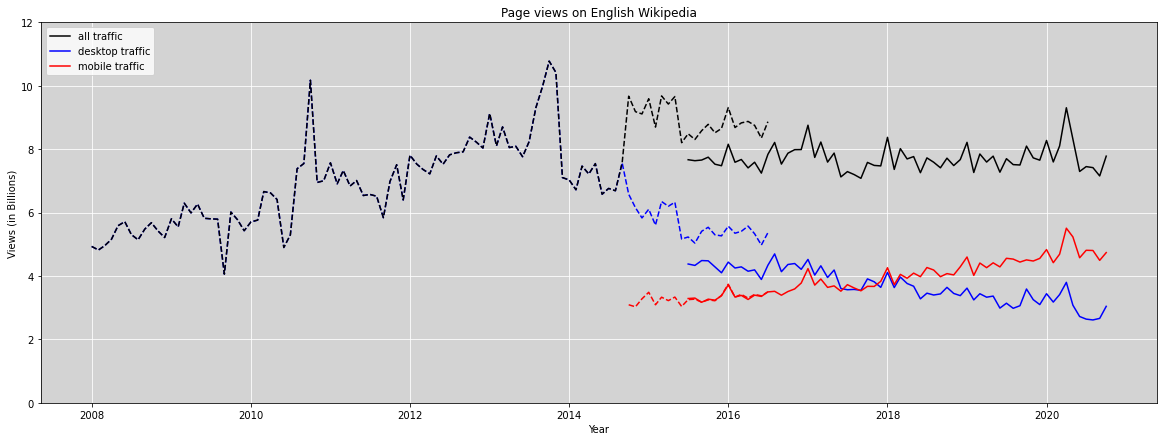

In [137]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(time_series,traffic_df["pageview_all_views"], color="black")
ax.plot(time_series,traffic_df["pageview_desktop_views"], color="blue")
ax.plot(time_series,traffic_df["pageview_mobile_views"], color="red")
ax.plot(time_series,traffic_df[["pagecount_desktop_views", "pagecount_all_views"]].min(axis=1), color="blue", linestyle="dashed")
ax.plot(time_series,traffic_df[["pagecount_desktop_views", "pagecount_all_views"]].max(axis=1), color="black", linestyle="dashed")
ax.plot(time_series,traffic_df["pagecount_mobile_views"], color="red", linestyle="dashed")
ax.set_xlabel("Year")  
ax.set_ylabel('Views (in Billions)')  
ax.set_title("Page views on English Wikipedia")  
ax.legend(("all traffic", "desktop traffic", "mobile traffic"), loc="upper left")
ax.grid(color="white")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(x/1000000000)))
ax.set_facecolor('lightgrey')
ax.set_ylim(bottom=0, top=12000000000)
fig.savefig('page_views_en_wikipedia.jpg', format="jpg")
fig.savefig('page_views_en_wikipedia.png', format="png")

![wikipedia_pageViews_2008-2020.png](img/wikipedia_pageViews_2008-2020.png)

***

#### Credits

This exercise is slighty adapted from the course [Human Centered Data Science (Fall 2019)](https://wiki.communitydata.science/Human_Centered_Data_Science_(Fall_2019)) of [Univeristy of Washington](https://www.washington.edu/datasciencemasters/) by [Jonathan T. Morgan](https://wiki.communitydata.science/User:Jtmorgan).

Same as the original inventors, we release the notebooks under the [Creative Commons Attribution license (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/).